In [124]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [478]:
df2019 = pd.read_csv('2019.csv')

In [479]:
df2020 = pd.read_csv('2020.csv')

In [480]:
df_stat = pd.read_csv('CLEAN_static.csv')

In [481]:
df=df_stat.drop(['number_guns', 'gun_stolen',"gun_type"], axis=1)

In [491]:
df

,date,state,city,total_killed,total_injured
incident_id,,,,,
461105,2013-01-01,Pennsylvania,Mckeesport,0,4
460726,2013-01-01,California,Hawthorne,1,3
478855,2013-01-01,Ohio,Lorain,1,3
478925,2013-01-05,Colorado,Aurora,4,0
478959,2013-01-07,North Carolina,Greensboro,2,2
...,...,...,...,...,...
1083142,2018-03-31,Louisiana,Rayne,0,0
1083139,2018-03-31,Louisiana,Natchitoches,1,0
1083151,2018-03-31,Louisiana,Gretna,0,1


In [489]:
df['date']=pd.to_datetime(df['date'])

In [492]:
df.dtypes

date             datetime64[ns]
state                    object
city                     object
total_killed              int64
total_injured             int64
dtype: object

In [483]:
df2020=df2020.drop(['source_url',"address"], axis=1)
df2019=df2019.drop(['source_url',"address"], axis=1)


In [487]:
df2019['date']=pd.to_datetime(df2019['date'])
df2020['date']=pd.to_datetime(df2020['date'])
df2020['date']=df2020['date'].dt.date
df2019['date']=df2019['date'].dt.date


In [484]:
df2020=df2020.rename({'incident_url': 'incident_id',"city_or_county":"city","n_killed":"total_killed","n_injured":"total_injured"}, axis=1)
df2019=df2019.rename({'incident_url': 'incident_id',"city_or_county":"city","n_killed":"total_killed","n_injured":"total_injured"}, axis=1)

In [485]:
df2020=df2020.set_index('incident_id')
df2019=df2019.set_index('incident_id')
df=df.set_index('incident_id')

In [488]:
df2020.head()

,date,state,city,total_killed,total_injured
incident_id,,,,,
http://www.gunviolencearchive.org/incident/1657541,2020-04-11,Oregon,Portland,1,0
http://www.gunviolencearchive.org/incident/1656845,2020-04-11,Michigan,Kalamazoo,1,2
http://www.gunviolencearchive.org/incident/1657550,2020-04-11,Michigan,Detroit,0,1
http://www.gunviolencearchive.org/incident/1657561,2020-04-11,Iowa,Des Moines,0,1
http://www.gunviolencearchive.org/incident/1657410,2020-04-11,California,La Puente,1,0


In [464]:
df.dtypes

date             datetime64[ns]
state                    object
city                     object
total_killed              int64
total_injured             int64
dtype: object

In [449]:
df2019.dtypes

date             datetime64[ns]
state                    object
city                     object
total_killed              int64
total_injured             int64
dtype: object

In [452]:
df2020.dtypes

date             datetime64[ns]
state                    object
city                     object
total_killed              int64
total_injured             int64
dtype: object

In [494]:
frames = [df, df2019, df2020]
result = pd.concat(frames)

In [495]:
result

,date,state,city,total_killed,total_injured
incident_id,,,,,
461105,2013-01-01 00:00:00,Pennsylvania,Mckeesport,0,4
460726,2013-01-01 00:00:00,California,Hawthorne,1,3
478855,2013-01-01 00:00:00,Ohio,Lorain,1,3
478925,2013-01-05 00:00:00,Colorado,Aurora,4,0
478959,2013-01-07 00:00:00,North Carolina,Greensboro,2,2
...,...,...,...,...,...
http://www.gunviolencearchive.org/incident/1636294,2020-03-08,New York,Syracuse,0,1
http://www.gunviolencearchive.org/incident/1636305,2020-03-08,Tennessee,Memphis,0,1
http://www.gunviolencearchive.org/incident/1636307,2020-03-08,Texas,Austin,0,1


In [496]:
result.to_csv(r'general_data_2013to2020.csv')

In [497]:
result_index=result.reset_index()

In [498]:
result_index.to_csv(r'general_data_2013to2020_index.csv')

In [99]:
result.groupby(['date','state'])['total_killed'].size()

date        state         
2013-01-01  California         1
            Ohio               1
            Pennsylvania       1
2013-01-05  Colorado           1
2013-01-07  North Carolina     1
                              ..
2020-12-31  Texas             27
            Virginia           4
            Washington         1
            West Virginia      1
            Wisconsin          1
Name: total_killed, Length: 87436, dtype: int64

In [95]:
result.dtypes

date             object
state            object
city             object
total_killed      int64
total_injured     int64
dtype: object

In [329]:
result["date"]=pd.to_datetime(result['date'])

In [499]:
result

,date,state,city,total_killed,total_injured
incident_id,,,,,
461105,2013-01-01 00:00:00,Pennsylvania,Mckeesport,0,4
460726,2013-01-01 00:00:00,California,Hawthorne,1,3
478855,2013-01-01 00:00:00,Ohio,Lorain,1,3
478925,2013-01-05 00:00:00,Colorado,Aurora,4,0
478959,2013-01-07 00:00:00,North Carolina,Greensboro,2,2
...,...,...,...,...,...
http://www.gunviolencearchive.org/incident/1636294,2020-03-08,New York,Syracuse,0,1
http://www.gunviolencearchive.org/incident/1636305,2020-03-08,Tennessee,Memphis,0,1
http://www.gunviolencearchive.org/incident/1636307,2020-03-08,Texas,Austin,0,1


In [507]:
result['month']=pd.to_datetime(result['date'])

In [508]:
result["month"]=result["month"].dt.to_period(freq ="M")

In [500]:
result["year"]=result["date"].dt.to_period(freq ="Y")

AttributeError: Can only use .dt accessor with datetimelike values

In [511]:
result=result.drop(["date"],axis=1)

In [334]:
result.groupby(['month','state'])['total_killed'].size()

month    state               
2013-01  California                2
         Colorado                  1
         District of Columbia      1
         Louisiana                 2
         Maryland                  1
                                ... 
2019-12  Virginia                239
         Washington               85
         West Virginia            46
         Wisconsin               216
         Wyoming                   8
Name: total_killed, Length: 3383, dtype: int64

In [512]:
result=result.reset_index()

In [336]:
result.groupby(['month','state'])["incident_id"].count()

month    state               
2013-01  California                2
         Colorado                  1
         District of Columbia      1
         Louisiana                 2
         Maryland                  1
                                ... 
2019-12  Virginia                239
         Washington               85
         West Virginia            46
         Wisconsin               216
         Wyoming                   8
Name: incident_id, Length: 3383, dtype: int64

In [337]:
df1=result.groupby(['month','state'])["incident_id"].count().reset_index()
df1

,month,state,incident_id
0,2013-01,California,2
1,2013-01,Colorado,1
2,2013-01,District of Columbia,1
3,2013-01,Louisiana,2
4,2013-01,Maryland,1
...,...,...,...
3378,2019-12,Virginia,239
3379,2019-12,Washington,85
3380,2019-12,West Virginia,46
3381,2019-12,Wisconsin,216


In [338]:
df1=df1.rename({'incident_id': 'n_incidents'}, axis=1)

In [339]:
df1

,month,state,n_incidents
0,2013-01,California,2
1,2013-01,Colorado,1
2,2013-01,District of Columbia,1
3,2013-01,Louisiana,2
4,2013-01,Maryland,1
...,...,...,...
3378,2019-12,Virginia,239
3379,2019-12,Washington,85
3380,2019-12,West Virginia,46
3381,2019-12,Wisconsin,216


In [340]:
df2=result.groupby(['month'])["incident_id"].count().reset_index()
df2=df2.rename({'incident_id': 'n_incidents'}, axis=1)
df2=df2.set_index("month")
df2

,n_incidents
month,
2013-01,15
2013-02,12
2013-03,19
2013-04,17
2013-05,27
...,...
2019-08,10066
2019-09,9120
2019-10,8672


<AxesSubplot:xlabel='month'>

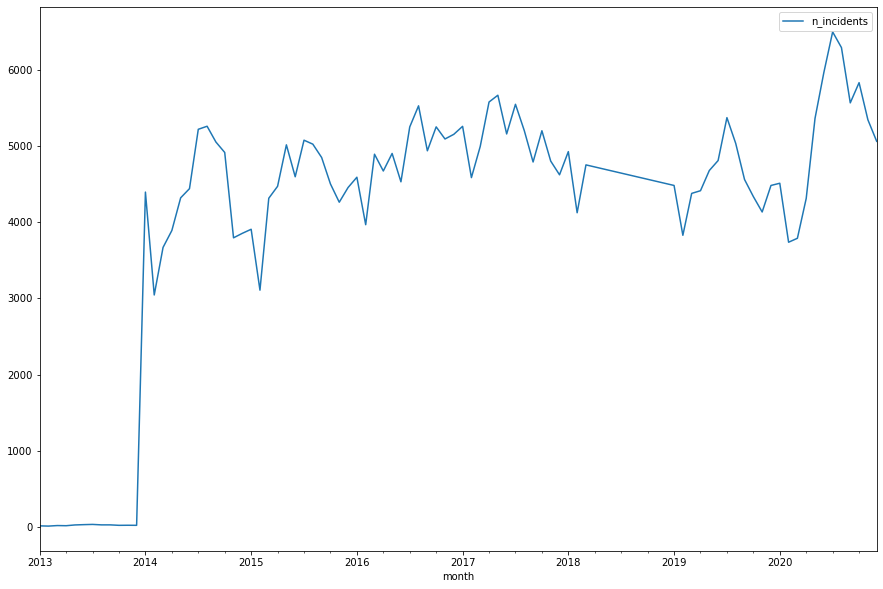

In [130]:
df2.plot(figsize=(15,10))

In [341]:
df3=df2.pct_change()
df3

,n_incidents
month,
2013-01,NaN
2013-02,-0.200000
2013-03,0.583333
2013-04,-0.105263
2013-05,0.588235
...,...
2019-08,-0.063105
2019-09,-0.093980
2019-10,-0.049123


In [134]:
df3.nlargest(10,"n_incidents")

,n_incidents
month,
2014-01,198.772727
2013-05,0.588235
2013-03,0.583333
2015-03,0.388031
2020-05,0.243738
2016-03,0.233174
2014-03,0.204926
2014-07,0.175450
2016-07,0.158940


In [135]:
df3.nsmallest(10,"n_incidents")

,n_incidents
month,
2014-02,-0.307167
2014-11,-0.227874
2013-10,-0.214286
2015-02,-0.204505
2013-02,-0.200000
2013-08,-0.176471
2020-02,-0.171581
2018-02,-0.162810
2019-02,-0.145917


In [148]:
dfy=result.groupby(['year'])["incident_id"].count().reset_index()
dfy

,year,incident_id
0,2013,278
1,2014,51854
2,2015,53579
3,2016,58763
4,2017,61401
5,2018,13802
6,2019,54505
7,2020,62265


In [199]:
results_tot=result.groupby(['year'])[["total_killed","total_injured"]].sum().reset_index()

In [342]:
df_nics = pd.read_csv('nics-firearm-background-checks.csv')
df_nics

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [367]:
#adds year as new column
df_nics["month"]=pd.to_datetime(df_nics['month'])
df_nics["year_only"] = pd.to_datetime(df_nics['month'])
df_nics["year_only"] = df_nics['year_only'].dt.strftime('%Y')
#adds month as new column
#df_nics["month"] = df_nics['month'].dt.strftime('%m')
df_nics

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_only
0,2021-05-01,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937,2021
1,2021-05-01,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145,2021
2,2021-05-01,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581,2021
3,2021-05-01,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206,2021
4,2021-05-01,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998
14901,1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998
14902,1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998
14903,1998-11-01,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998


In [368]:
df_nics_clean=df_nics.drop(["return_to_seller_other","return_to_seller_long_gun","return_to_seller_handgun",
             "totals", "rentals_handgun","rentals_long_gun","admin",
             'prepawn_handgun', 'prepawn_long_gun','prepawn_other',
                            'returned_handgun', 'returned_long_gun','returned_other'], axis=1)

In [369]:
df_nics_clean

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only
0,2021-05-01,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,1441.0,531.0,14.0,29.0,15.0,9.0,2021
1,2021-05-01,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,98.0,57.0,1.0,12.0,14.0,0.0,2021
2,2021-05-01,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,765.0,229.0,2.0,11.0,10.0,1.0,2021
3,2021-05-01,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,562.0,405.0,1.0,8.0,8.0,2.0,2021
4,2021-05-01,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,426.0,245.0,16.0,8165.0,3024.0,657.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,1998
14901,1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,1998
14902,1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,1998
14903,1998-11-01,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1998


In [370]:
df_nics_clean["year_only"]=df_nics_clean["year_only"].astype(int)

In [372]:
df_nics_clean = df_nics_clean[(df_nics_clean['year_only'] >= 2013) &
                              (df_nics_clean['year_only'] <= 2020)]

In [371]:
df_nics_clean["total"]=df_nics_clean.loc[:,['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other']].sum(axis=1)

In [373]:
df_nics_clean

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total
275,2020-12-01,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12-01,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12-01,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12-01,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12-01,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


In [350]:
df_nics_clean.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'year_only', 'total'],
      dtype='object')

In [278]:
df_nics_clean.groupby(['year_only'])[['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other']].sum().reset_index()

,year_only,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other
0,1998,78169.0,0.0,219999.0,582791.0,0.0,8720,0.0,0.0,0.0,0.0,0.0,0.0
1,1999,1037700.0,0.0,2536738.0,5217451.0,0.0,103743,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,1227814.0,0.0,2191879.0,4779978.0,0.0,95777,0.0,0.0,0.0,0.0,0.0,0.0
3,2001,1408338.0,0.0,2167213.0,4943375.0,0.0,97132,26999.0,72322.0,0.0,0.0,0.0,0.0
4,2002,1363211.0,0.0,1845112.0,4409311.0,0.0,93069,171051.0,392377.0,0.0,0.0,0.0,0.0
5,2003,1403496.0,0.0,1851078.0,4383057.0,0.0,99236,181927.0,399702.0,0.0,0.0,0.0,0.0
6,2004,1345672.0,0.0,1990460.0,4506847.0,0.0,101985,182539.0,390427.0,0.0,0.0,0.0,0.0
7,2005,1350193.0,0.0,2241740.0,4584462.0,0.0,109750,183116.0,375703.0,0.0,0.0,0.0,0.0
8,2006,2037453.0,0.0,2441325.0,4789591.0,0.0,130117,186385.0,356850.0,0.0,0.0,0.0,0.0
9,2007,3078802.0,0.0,2635629.0,4570697.0,0.0,324401,180790.0,336230.0,0.0,0.0,0.0,0.0


In [216]:
results_tot["total"]=results_tot["total_killed"]+results_tot["total_injured"]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total
275,2020-12-01,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12-01,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12-01,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12-01,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12-01,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


In [249]:
df_nics_y=df_nics_clean.groupby(['year_only'])[["total"]].sum().reset_index()
df_nics_y.rename({'total': 'nics_total'},axis=1)

,year_only,nics_total
0,2013,20955004.0
1,2014,20850598.0
2,2015,22992368.0
3,2016,27384290.0
4,2017,24901713.0
5,2018,25691015.0
6,2019,27904142.0
7,2020,39223277.0


In [220]:
results_tot

,year,total_killed,total_injured,total
0,2013,317,979,1296
1,2014,12557,23002,35559
2,2015,13484,26967,40451
3,2016,15066,30580,45646
4,2017,15511,30703,46214
5,2018,3533,6171,9704
6,2019,15435,30143,45578
7,2020,19319,39408,58727


In [224]:
column_1 = df_nics_y["total"]
column_2 = results_tot["total"]
correlation = column_1.corr(column_2)
correlation

0.6088847830796048

In [250]:
new_nics=df_nics_y.rename({'total': 'nics_total'},axis=1)

In [252]:
new_result = pd.concat([new_nics, results_tot], axis=1, join="inner")
new_result

,year_only,nics_total,year,total_killed,total_injured,total
0,2013,20955004.0,2013,317,979,1296
1,2014,20850598.0,2014,12557,23002,35559
2,2015,22992368.0,2015,13484,26967,40451
3,2016,27384290.0,2016,15066,30580,45646
4,2017,24901713.0,2017,15511,30703,46214
5,2018,25691015.0,2018,3533,6171,9704
6,2019,27904142.0,2019,15435,30143,45578
7,2020,39223277.0,2020,19319,39408,58727


In [254]:
new_result=new_result.drop(["year_only"],axis=1)
new_result

,nics_total,year,total_killed,total_injured,total
0,20955004.0,2013,317,979,1296
1,20850598.0,2014,12557,23002,35559
2,22992368.0,2015,13484,26967,40451
3,27384290.0,2016,15066,30580,45646
4,24901713.0,2017,15511,30703,46214
5,25691015.0,2018,3533,6171,9704
6,27904142.0,2019,15435,30143,45578
7,39223277.0,2020,19319,39408,58727


In [255]:
formula1="total~nics_total"

In [258]:
formula1="total~nics_total"
model1=sm.ols(formula=formula1,data=new_result)
fitted1=model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3.535
Date:                Sat, 24 Jul 2021   Prob (F-statistic):              0.109
Time:                        11:13:57   Log-Likelihood:                -88.074
No. Observations:                   8   AIC:                             180.1
Df Residuals:                       6   BIC:                             180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.812e+04   2.91e+04     -0.623      0.5

/Users/stephaniejung/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [239]:
import statsmodels.formula.api as sm

In [231]:
new_df=dfy.copy()

In [234]:
new_df=new_df.rename({'incident_id': 'total'}, axis=1)
new_df

,year,total
0,2013,278
1,2014,51854
2,2015,53579
3,2016,58763
4,2017,61401
5,2018,13802
6,2019,54505
7,2020,62265


In [237]:
column_3=new_df["total"]
other_correlation=column_1.corr(column_3)
other_correlation

0.4324416939047598

In [513]:
df_months=result.groupby(['month',"state"])[["total_killed","total_injured"]].sum().reset_index()
df_months["total"]=df_months["total_killed"]+df_months["total_injured"]
df_months

,month,state,total_killed,total_injured,total
0,2013-01,California,1,7,8
1,2013-01,Colorado,4,0,4
2,2013-01,District of Columbia,0,5,5
3,2013-01,Louisiana,2,8,10
4,2013-01,Maryland,1,6,7
...,...,...,...,...,...
3987,2020-12,Virginia,42,72,114
3988,2020-12,Washington,12,22,34
3989,2020-12,West Virginia,26,10,36
3990,2020-12,Wisconsin,22,78,100


In [374]:
df_nics_clean['month'] = df_nics_clean['month'].dt.strftime('%Y-%m')
df_nics_clean

<ipython-input-374-f549138b1813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nics_clean['month'] = df_nics_clean['month'].dt.strftime('%Y-%m')


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


In [375]:
df_nics_clean=df_nics_clean.rename({'total': 'total_nics'},axis=1)

In [520]:
df_fml=df_nics_clean.copy()

In [521]:
df_m2=df_months.copy()
df_m2

,month,state,total_killed,total_injured,total
0,2013-01,California,1,7,8
1,2013-01,Colorado,4,0,4
2,2013-01,District of Columbia,0,5,5
3,2013-01,Louisiana,2,8,10
4,2013-01,Maryland,1,6,7
...,...,...,...,...,...
3987,2020-12,Virginia,42,72,114
3988,2020-12,Washington,12,22,34
3989,2020-12,West Virginia,26,10,36
3990,2020-12,Wisconsin,22,78,100


In [397]:
df_fml.dtypes

month                     object
state                     object
permit                   float64
permit_recheck           float64
handgun                  float64
long_gun                 float64
other                    float64
multiple                   int64
redemption_handgun       float64
redemption_long_gun      float64
redemption_other         float64
private_sale_handgun     float64
private_sale_long_gun    float64
private_sale_other       float64
year_only                  int64
total_nics               float64
dtype: object

In [392]:
#df_fml['month'] = df_fml['month'].astype('|S')

In [517]:
df_m2.dtypes

month            object
state            object
total_killed      int64
total_injured     int64
total             int64
dtype: object

In [522]:
df_m2['month'] = df_m2['month'].astype('|S')

In [390]:
#df_m2['month'] = df_m2['month'].astype('|S')

In [518]:
#df_fml=df_fml.set_index("month")

In [519]:
#df_m2=df_m2.set_index("month")

In [410]:
df_m2

,total_killed,total_injured,total
month,,,
2013-01,23,44,67
2013-02,14,45,59
2013-03,25,75,100
2013-04,26,52,78
2013-05,20,101,121
...,...,...,...
2019-08,2921,6217,9138
2019-09,2761,5371,8132
2019-10,2673,5153,7826


In [314]:
df_nics_clean.head()

month              object
state              object
permit            float64
permit_recheck    float64
handgun           float64
dtype: object

In [418]:
df_fml

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total_nics
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0


In [523]:
df_m2["work"]=df_m2["month"]+df_m2["state"]

In [524]:
df_fml["work"]=df_fml["month"]+df_fml["state"]

In [428]:
df_m2

,month,state,total_killed,total_injured,total,work
0,2013-01,California,1,7,8,2013-01California
1,2013-01,Colorado,4,0,4,2013-01Colorado
2,2013-01,District of Columbia,0,5,5,2013-01District of Columbia
3,2013-01,Louisiana,2,8,10,2013-01Louisiana
4,2013-01,Maryland,1,6,7,2013-01Maryland
...,...,...,...,...,...,...
3378,2019-12,Virginia,64,161,225,2019-12Virginia
3379,2019-12,Washington,36,48,84,2019-12Washington
3380,2019-12,West Virginia,15,19,34,2019-12West Virginia
3381,2019-12,Wisconsin,34,146,180,2019-12Wisconsin


In [529]:
df_fml.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [530]:
df_fml

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total_nics,work
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0,2020-12Alabama
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0,2020-12Alaska
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0,2020-12Arizona
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0,2020-12Arkansas
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0,2020-12California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,NaN,NaN,NaN,2013,60837.0,2013-01Virginia
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,73529.0,2013-01Washington
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,957.0,1707.0,1.0,NaN,NaN,NaN,2013,26769.0,2013-01West Virginia
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,52.0,230.0,0.0,NaN,NaN,NaN,2013,56971.0,2013-01Wisconsin


In [525]:
df_fml_index=df_fml.set_index("work")

In [526]:
df_m2_index=df_m2.set_index("work")

In [531]:
df_m2_index

,month,state,total_killed,total_injured,total
work,,,,,
2013-01California,2013-01,California,1,7,8
2013-01Colorado,2013-01,Colorado,4,0,4
2013-01District of Columbia,2013-01,District of Columbia,0,5,5
2013-01Louisiana,2013-01,Louisiana,2,8,10
2013-01Maryland,2013-01,Maryland,1,6,7
...,...,...,...,...,...
2020-12Virginia,2020-12,Virginia,42,72,114
2020-12Washington,2020-12,Washington,12,22,34
2020-12West Virginia,2020-12,West Virginia,26,10,36


In [538]:
df_m2_index.month.unique()


array(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', 

In [539]:
newnew_df = df_fml_index.merge(df_m2_index,how="inner")
newnew_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total_nics,total_killed,total_injured,total
0,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0,44,62,106
1,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0,1,7,8
2,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0,38,31,69
3,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31578.0,29,39,68
4,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0,172,213,385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,2013-01,North Carolina,42040.0,NaN,1282.0,22157.0,755.0,192,1553.0,2296.0,5.0,NaN,NaN,NaN,2013,70280.0,2,2,4
3988,2013-01,Ohio,0.0,NaN,49243.0,29034.0,1625.0,1923,1083.0,1080.0,7.0,NaN,NaN,NaN,2013,83995.0,2,6,8
3989,2013-01,Oklahoma,0.0,NaN,24793.0,17756.0,922.0,1243,1629.0,1882.0,3.0,NaN,NaN,NaN,2013,48228.0,4,0,4
3990,2013-01,Pennsylvania,41617.0,NaN,61.0,93619.0,304.0,0,1.0,0.0,0.0,NaN,NaN,NaN,2013,135602.0,0,4,4


In [540]:
formula2="total~total_nics"
model2=sm.ols(formula=formula2,data=newnew_df)
fitted2=model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1777.
Date:                Sat, 24 Jul 2021   Prob (F-statistic):          1.47e-321
Time:                        12:36:28   Log-Likelihood:                -22503.
No. Observations:                3992   AIC:                         4.501e+04
Df Residuals:                    3990   BIC:                         4.502e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6534      1.293     31.442      0.0

In [543]:
formula3="total~total_nics + state"
model3=sm.ols(formula=formula3,data=newnew_df)
fitted3=model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     221.9
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:41:02   Log-Likelihood:                -20536.
No. Observations:                3992   AIC:                         4.118e+04
Df Residuals:                    3940   BIC:                         4.150e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [544]:
column_3 = newnew_df["total"]
column_4 = newnew_df["total_nics"]
correlation = column_3.corr(column_4)
correlation

0.5551232476782735

In [575]:
df2018 = pd.read_csv('2018.csv')
df2018

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,1289686,"December 31, 2018",Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,1288376,"December 29, 2018",Ohio,Lima,904 S Main St,1,3,NaN
2,1287286,"December 28, 2018",Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
3,1284586,"December 24, 2018",Louisiana,Lutcher,2176 Main St,2,2,NaN
4,1283229,"December 23, 2018",Missouri,Springfield,1042 W College St,1,6,NaN
...,...,...,...,...,...,...,...,...
331,1022067,"January 7, 2018",Alabama,Union Springs,US-29,1,5,NaN
332,1022055,"January 7, 2018",Florida,Plantation,5225 W Broward Blvd,0,4,NaN
333,1021788,"January 5, 2018",Mississippi,Hattiesburg,6168 US 49,0,6,NaN
334,1020574,"January 4, 2018",Arkansas,Brinkley,615 W 6th St,1,3,NaN


In [576]:
df2018['date']=pd.to_datetime(df2018['Incident Date'])
df2018['date']=df2018['date'].dt.date

In [577]:
df2018=df2018.drop(["Address","Incident Date","Incident ID","Operations"], axis=1)

In [578]:
df2018=df2018.rename({"State":"state","# Killed":"total_killed","# Injured":"total_injured","City Or County":"city"},axis=1)

In [579]:
df2018

,state,city,total_killed,total_injured,date
0,Ohio,Cleveland,3,2,2018-12-31
1,Ohio,Lima,1,3,2018-12-29
2,Missouri,Saint Charles,4,1,2018-12-28
3,Louisiana,Lutcher,2,2,2018-12-24
4,Missouri,Springfield,1,6,2018-12-23
...,...,...,...,...,...
331,Alabama,Union Springs,1,5,2018-01-07
332,Florida,Plantation,0,4,2018-01-07
333,Mississippi,Hattiesburg,0,6,2018-01-05
334,Arkansas,Brinkley,1,3,2018-01-04
